### Medical Insurance Price Prediction

Overview of the dataset:
The medical insurance dataset contains information about a number of factors that can affect medical expenses, including age, sex, BMI, smoking status, number of children, and region. This dataset can be used to train a machine learning model that can predict medical expenses for new customers. To provide insights into the key factors that contribute to higher insurance costs and help the company make more informed decisions regarding pricing and risk assessment.

The dataset contains 2.7K rows and 7 columns.
Columns include:
1. Age
2. Sex
3. BMI (Body Mass Index)
4. Children
5. Smoker
6. Region
7. Charges

In [2]:
# Install required libraries
! pip install pandas; numpy; seaborn; matplotlib; sklearn; skillsnetwork; seaborn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [3]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

### Import The Dataset

In [4]:
import pandas as pd
import zipfile
import os

# --- Step 1: Download the Dataset Using the Kaggle API ---

# This API command is obtained from the dataset's Kaggle page.
# This command will download the 'medical-insurance-price-prediction.zip' file to your directory.
print("Starting to download dataset from Kaggle...")
!kaggle datasets download -d harishkumardatalab/medical-insurance-price-prediction
print("Dataset downloaded successfully.")


# --- Step 2: Extract Files from the .zip ---

# The zip file name must match the downloaded file.
zip_file_name = 'medical-insurance-price-prediction.zip' 

# Creating a zip object
try:
    with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
        # Extract all files to the current directory (represented by '.')
        zip_ref.extractall('.')
    print(f"'{zip_file_name}' extracted successfully.")
except FileNotFoundError:
    print(f"Error: File '{zip_file_name}' not found. Please ensure the download was successful.")
    # Exit the script if the file is not found
    exit()


# --- Step 3: Load Data into a Pandas DataFrame ---

# From the Kaggle page, we know the file inside is named 'Medical_insurance.csv'.
file_name = 'medical_insurance.csv'

# Read the CSV file into a DataFrame
try:
    df = pd.read_csv(file_name)
    print(f"Data from '{file_name}' loaded into DataFrame successfully.")
    
    # Display the first 5 rows to ensure the data is correct.
    print("\nHere are the first 5 rows of the data:")
    print(df.head())

except FileNotFoundError:
    print(f"Error: File '{file_name}' not found after extraction.")

# --- Step 4 (Optional): Delete the no longer needed .zip file ---
# This is to keep your working directory clean.
try:
    os.remove(zip_file_name)
    print(f"\nThe unused file '{zip_file_name}' has been deleted.")
except OSError as e:
    print(f"Error while deleting the zip file: {e}")

Starting to download dataset from Kaggle...
Dataset URL: https://www.kaggle.com/datasets/harishkumardatalab/medical-insurance-price-prediction
License(s): CC0-1.0

Dataset downloaded successfully.
'medical-insurance-price-prediction.zip' extracted successfully.
Data from 'medical_insurance.csv' loaded into DataFrame successfully.

Here are the first 5 rows of the data:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

The unused file 'medical-insurance-price-prediction.zip' has been deleted.



  0%|          | 0.00/31.6k [00:00<?, ?B/s]
100%|██████████| 31.6k/31.6k [00:00<00:00, 312kB/s]
100%|██████████| 31.6k/31.6k [00:00<00:00, 308kB/s]


In [5]:
# Add the headers to the dataframe, as mentioned in the project scenario
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns = headers

In [6]:
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
# Drop index 0 and reset index
df.drop(index=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [8]:
# Replace '?' with 'NaN' value
df.replace('?', np.nan, inplace = True)

### Data Wrangling

In [9]:
# Use dataframe.info() to identify the columns that have some 'Null' (or NaN) information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2771 non-null   int64  
 1   gender          2771 non-null   object 
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2771 non-null   object 
 5   region          2771 non-null   object 
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [10]:
# Converting 'gender' column
# Create a mapping dictionary
gender_map = {'male': 1, 'female': 2}
# Apply the map to the column
df['gender'] = df['gender'].map(gender_map)

# Converting 'smoker' column
smoker_map = {'yes': 1, 'no': 0}
df['smoker'] = df['smoker'].map(smoker_map)

# Converting 'region' column
region_map = {'northwest': 1, 'northeast': 2, 'southwest': 3, 'southeast': 4}
df['region'] = df['region'].map(region_map)

In [11]:
# Evaluating columns with missing value
missing_data = df.isnull()
missing_data.head(5)

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

age
False    2771
Name: age, dtype: int64

gender
False    2771
Name: gender, dtype: int64

bmi
False    2771
Name: bmi, dtype: int64

no_of_children
False    2771
Name: no_of_children, dtype: int64

smoker
False    2771
Name: smoker, dtype: int64

region
False    2771
Name: region, dtype: int64

charges
False    2771
Name: charges, dtype: int64



In [12]:
# Replace missing value with mean and most frequent value
is_smoker = df['smoker'].value_counts().idxmax()
df["smoker"].replace(np.nan, is_smoker, inplace=True)

mean_age = df['age'].astype('float').mean(axis=0)
df["age"].replace(np.nan, mean_age, inplace=True)

In [13]:
# Update the charges column such that all values are rounded to nearest 2 decimal places
df[["charges"]] = np.round(df[["charges"]],2)
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,1,33.770,1,0,4,1725.55
1,28,1,33.000,3,0,4,4449.46
2,33,1,22.705,0,0,1,21984.47
3,32,1,28.880,0,0,1,3866.86
4,31,2,25.740,0,0,4,3756.62


### Exploratory Data Analysis

(0.0, 66902.85800000001)

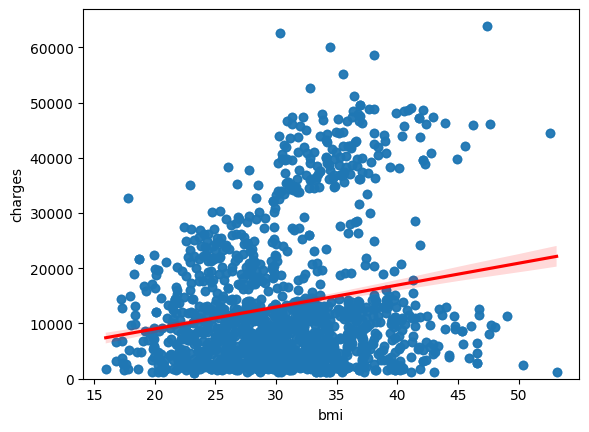

In [14]:
#  Implement the regression plot for charges with respect to bmi
sns.regplot(x="bmi", y="charges", data=df, line_kws={"color": "red"})
plt.ylim(0,)

<Axes: xlabel='smoker', ylabel='charges'>

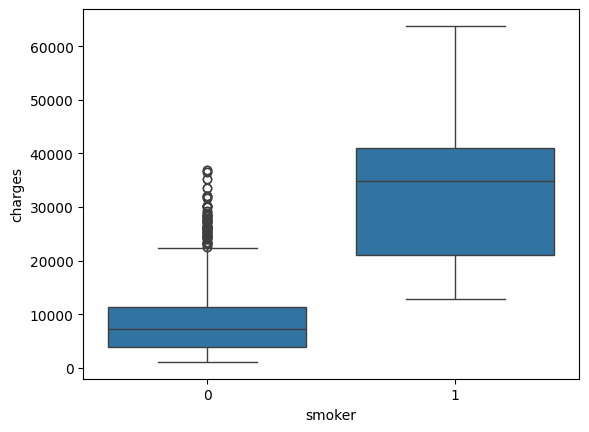

In [15]:
# Implement the box plot for charges with respect to smoker
sns.boxplot(x="smoker", y="charges", data=df)

In [16]:
# Print correlation matrix of dataset
df.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,0.026584,0.112859,0.037126,-0.022290,-0.006969,0.298892
gender,0.026584,1.000000,-0.042766,-0.015693,-0.083125,-0.022360,-0.062959
bmi,0.112859,-0.042766,1.000000,-0.001642,0.011824,0.271200,0.199906
no_of_children,0.037126,-0.015693,-0.001642,1.000000,0.007016,-0.025594,0.066551
smoker,-0.022290,-0.083125,0.011824,0.007016,1.000000,0.053839,0.789141
region,-0.006969,-0.022360,0.271200,-0.025594,0.053839,1.000000,0.054018
charges,0.298892,-0.062959,0.199906,0.066551,0.789141,0.054018,1.000000


### Model Development

In [17]:
# Fit a linear regression model that may be used to predict the charges value by using the smoker attribute of the dataset and print r-squared value of this model
X = df[['smoker']]
Y = df['charges']
lm = LinearRegression()
lm.fit(X,Y)
print(lm.score(X, Y))

0.6227430402464125


In [18]:
# Fit a linear regression model that may be used to predict the charges value by using all other attributes of the dataset. Print the r-squared value of the model.
Z = df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]
lm.fit(Z,Y)
print(lm.score(Z, Y))

0.7505888664568174


In [38]:
# Create a training pipeline that uses StandardScaler(), PolynomialFeatures() and LinearRegression() to create a model that can predict the charges value using all the other attributes of the dataset
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
print(r2_score(Y,ypipe))

0.8453719105568606


### Model Refinement

In [21]:
# Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=1)

In [22]:
# Initialize a Ridge regressor that used hyperparameter alpha = 0.1. Fit the model using training data data subset. Print the r-squared score for the testing data.
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))

0.7254198858412229


In [23]:
# Apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the r-squared score for the testing subset
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.8208489976692699


The best model is Multiple Linear Regression (MLR) using StandardScaler and PolynomialFeatures, because this model produces the highest R-squared score of 0.8452 (84.5%), which means it is able to explain around 84.5% of the variation in price data most accurately.